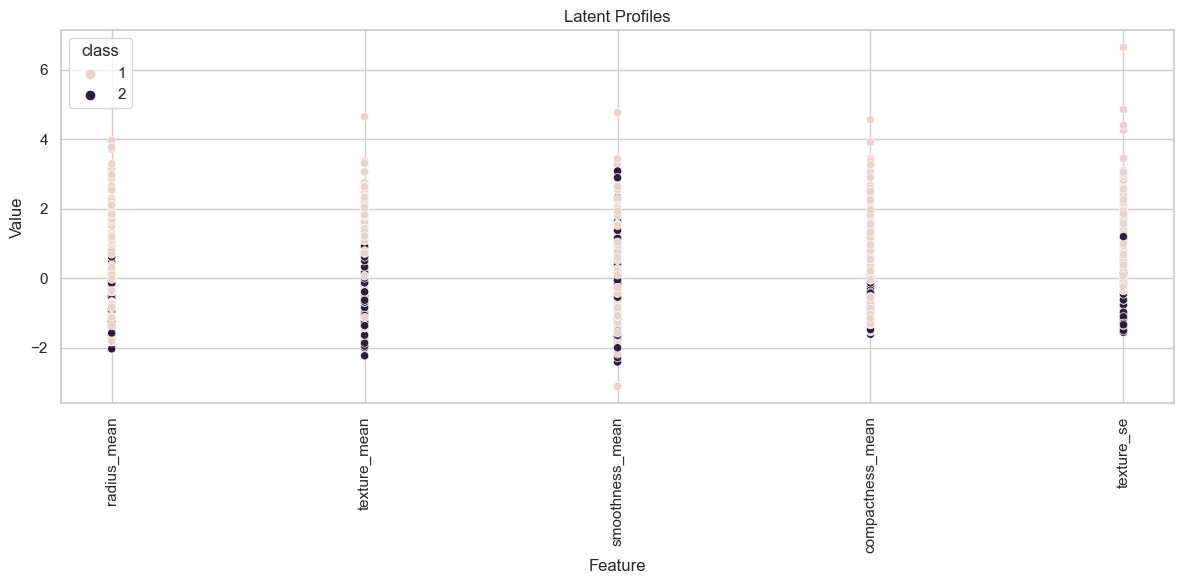

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format for easier plotting
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Feature', y='Value', hue='class', data=data_melted, marker='o')
plt.xticks(rotation=90)
plt.title('Latent Profiles')
plt.tight_layout()
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


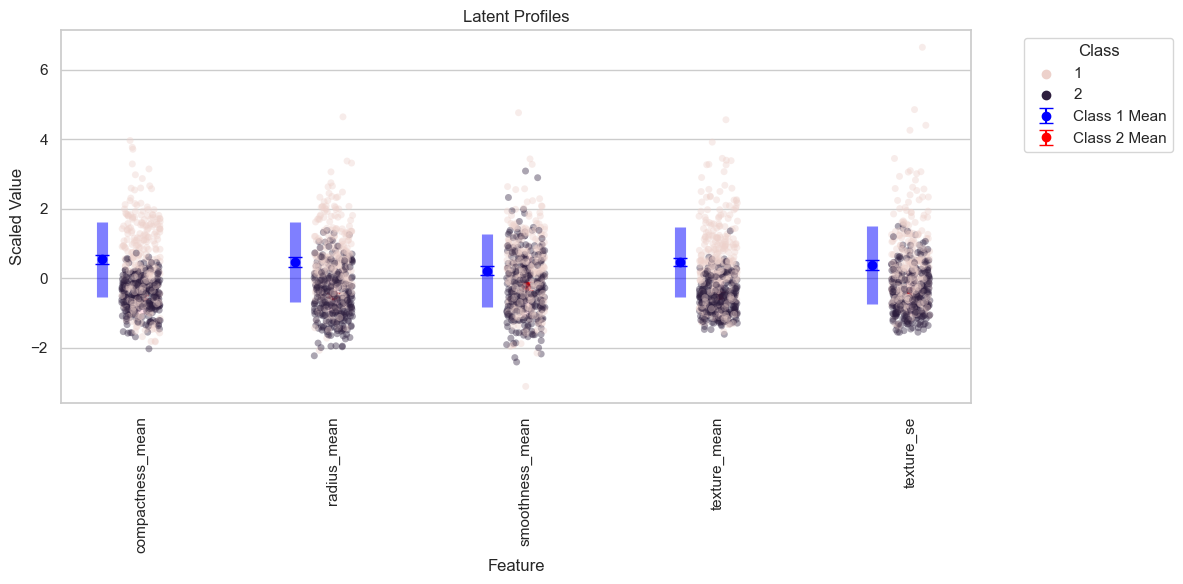

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot raw data points with transparency
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True
)

# Plot mean points with confidence intervals and standard deviations
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    # Adjust positions for each class
    positions = np.arange(len(cls_stats['Feature'].unique())) + (idx - len(group_stats['class'].unique()) / 2) * 0.2
    plt.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=5,
        color='blue' if idx == 0 else 'red'
    )
    # Add boxes representing ±1 standard deviation
    plt.vlines(
        positions,
        cls_stats['mean'] - cls_stats['std'],
        cls_stats['mean'] + cls_stats['std'],
        color='blue' if idx == 0 else 'pink',
        alpha=0.5,
        linewidth=8
    )

# Customize the plot
plt.xticks(
    ticks=np.arange(len(group_stats['Feature'].unique())),
    labels=group_stats['Feature'].unique(),
    rotation=90
)
plt.xlabel('Feature')
plt.ylabel('Scaled Value')
plt.title('Latent Profiles')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


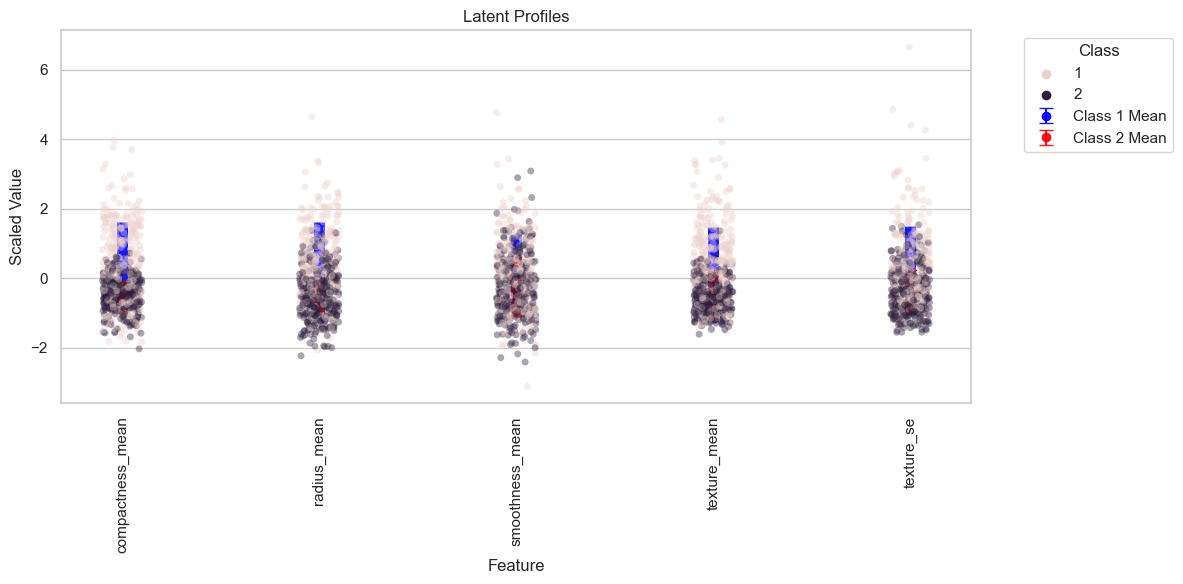

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot raw data points with transparency
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,  # Raw data not dodged
    alpha=0.4,
    jitter=True
)

# Slightly adjust positions to avoid complete overlap
num_classes = len(group_stats['class'].unique())
offset = np.linspace(-0.1, 0.1, num_classes)  # Adjust as needed for minimal offset

# Define colors for classes
class_colors = ['blue', 'red']  # Add more colors if you have more classes

# Plot mean points with confidence intervals and standard deviations
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    # Positions aligned with raw data, slight offset to prevent overlap
    positions = np.arange(len(cls_stats['Feature'].unique()))# + offset[idx]
    plt.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=5,
        color=class_colors[idx],
        alpha=0.9
    )
    # Add boxes representing ±1 standard deviation
    plt.vlines(
        positions,
        cls_stats['mean'] - cls_stats['std'],
        cls_stats['mean'] + cls_stats['std'],
        color=class_colors[idx],
        alpha=0.9,
        linewidth=8
    )

# Customize the plot
plt.xticks(
    ticks=np.arange(len(group_stats['Feature'].unique())),
    labels=group_stats['Feature'].unique(),
    rotation=90
)
plt.xlabel('Feature')
plt.ylabel('Scaled Value')
plt.title('Latent Profiles')

# Adjust legend to avoid duplicate entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1200x600 with 0 Axes>

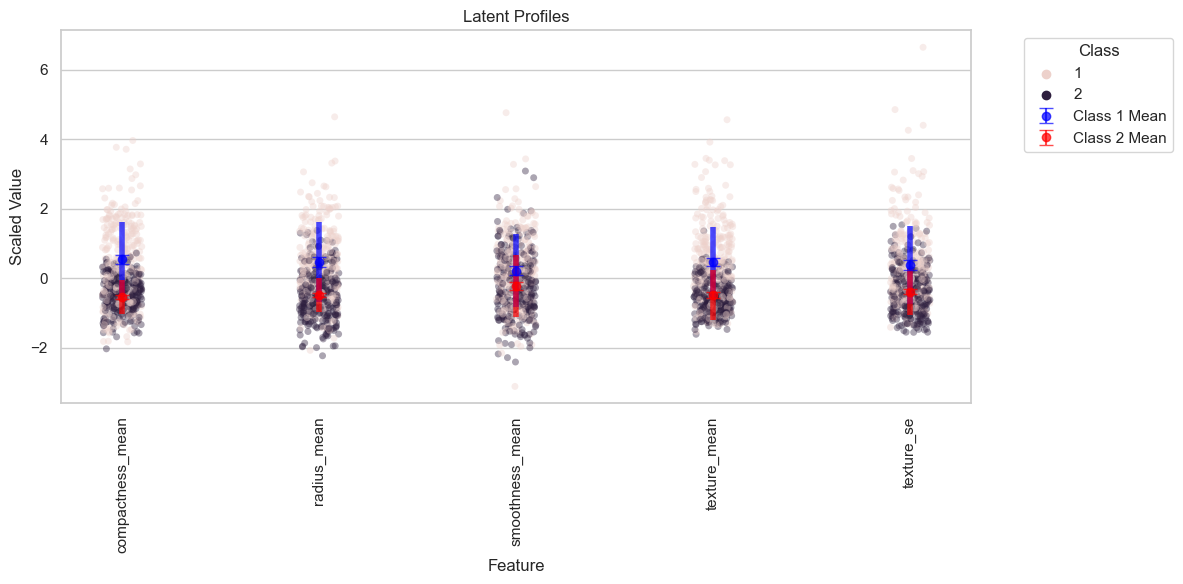

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Initialize the plot and get the Axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax  # Use the same Axes object
)

# Plot mean points and standard deviations on the same Axes
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    positions = np.arange(len(cls_stats['Feature'].unique()))
    # Standard deviation boxes
    ax.vlines(
        positions,
        cls_stats['mean'] - cls_stats['std'],
        cls_stats['mean'] + cls_stats['std'],
        color=class_colors[idx],
        alpha=0.7,
        linewidth=4,
        zorder=2
    )
    # Mean points with confidence intervals
    ax.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=5,
        color=class_colors[idx],
        alpha=0.7,
        zorder=3
    )

# Customize the plot using the Axes object
ax.set_xticks(np.arange(len(group_stats['Feature'].unique())))
ax.set_xticklabels(group_stats['Feature'].unique(), rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Scaled Value')
ax.set_title('Latent Profiles')

# Adjust legend to avoid duplicate entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

